In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Gerencias/lineas

#### Cargue base general

In [30]:
df_base = pd.read_excel("C:/Users/tcardenas/OneDrive/OneDrive - Grupo DISPAPELES/Documents/Análisis clustering/base_productos.xlsx")

In [31]:
df_base.columns

Index(['Ano', 'Mes', 'Distrito', 'Zona', 'Gerente', 'Linea', 'Ventas_mil'], dtype='object')

#### Group by distrito/gerencia/linea

In [32]:
df_gcia = df_base

In [34]:
df_gcia.columns

Index(['Ano', 'Mes', 'Distrito', 'Zona', 'Gerente', 'Linea', 'Ventas_mil'], dtype='object')

#### Medidas para nacional

In [58]:
#Distrito
df_mean_nal = df_gcia.groupby(['Distrito', 'Zona', 'Gerente', 'Linea']).mean()
df_mean_nal.rename({'Ventas_mil': 'media_mil'}, axis = 1, inplace = True)
df_mean_nal = pd.DataFrame(df_mean_nal['media_mil'])
df_sum_nal = df_gcia.groupby(['Distrito', 'Zona', 'Gerente', 'Linea']).sum()
df_sum_nal.rename({'Ventas_mil': 'suma_mil'}, axis = 1, inplace = True)
df_sum_nal = pd.DataFrame(df_sum_nal['suma_mil'])
df_sd_nal = df_gcia.groupby(['Distrito', 'Zona', 'Gerente', 'Linea']).std()
df_sd_nal.rename({'Ventas_mil': 'desviacion_mil'}, axis = 1, inplace = True)
df_sd_nal = pd.DataFrame(df_sd_nal['desviacion_mil'])
df_nal = pd.concat([df_sum_nal, df_mean_nal, df_sd_nal], axis = 1, join = "inner")
df_nal['IV'] = df_nal['desviacion_mil'] / df_nal['media_mil']
df_nal.reset_index(inplace=True)
df_nal['Distrito-Zona'] = df_nal['Distrito'].astype(str) + '-' + df_nal['Zona'].astype(str)
df_nal

,Distrito,Zona,Gerente,Linea,suma_mil,media_mil,desviacion_mil,IV,Distrito-Zona
0,10,1,Aseo - Familia,Familia,9867.26446,897.024042,841.818284,0.938457,10-1
1,10,1,Aseo - Kimberly,Kimberly,24635.64675,2052.970563,848.897793,0.413497,10-1
2,10,1,Cartulina,Cartón Colombia,136348.13161,19478.304516,15801.131115,0.811217,10-1
3,10,1,Cartulina,Cmpc,507295.97910,50729.597910,47756.290602,0.941389,10-1
4,10,1,Cartulina,Metsaboard,224853.85050,44970.770100,39915.209960,0.887581,10-1
...,...,...,...,...,...,...,...,...,...
5260,90,500,Prodispel,Sobres de linea,16073.95480,1339.496233,343.702506,0.256591,90-500
5261,90,500,Resmilla,Resmilla - Natural,12632.13800,1052.678167,674.600863,0.640842,90-500
5262,90,500,Resmilla,Resmilla - Otros,2051.72510,170.977092,163.615567,0.956944,90-500
5263,90,500,Resmilla,Resmilla - Reprograf,301993.83000,25166.152500,9568.987821,0.380232,90-500


In [114]:
#Distrito
df_nal.replace([np.inf, -np.inf], np.nan, inplace = True)
df_nal.dropna(inplace = True)
df_nal = df_nal.loc[df_nal['IV'] >= 0]
#df_nal.sort_values(by = ['Gerente', 'Linea'], inplace = True, ascending = True)
df_nal

C:\Users\TCARDE~1\AppData\Local\Temp/ipykernel_20360/3406125403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nal.replace([np.inf, -np.inf], np.nan, inplace = True)
C:\Users\TCARDE~1\AppData\Local\Temp/ipykernel_20360/3406125403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nal.dropna(inplace = True)


,Distrito,Zona,Gerente,Linea,suma_mil,media_mil,desviacion_mil,IV,Distrito-Zona
0,10,1,Aseo - Familia,Familia,9867.26446,897.024042,841.818284,0.938457,10-1
1,10,1,Aseo - Kimberly,Kimberly,24635.64675,2052.970563,848.897793,0.413497,10-1
2,10,1,Cartulina,Cartón Colombia,136348.13161,19478.304516,15801.131115,0.811217,10-1
3,10,1,Cartulina,Cmpc,507295.97910,50729.597910,47756.290602,0.941389,10-1
4,10,1,Cartulina,Metsaboard,224853.85050,44970.770100,39915.209960,0.887581,10-1
...,...,...,...,...,...,...,...,...,...
5260,90,500,Prodispel,Sobres de linea,16073.95480,1339.496233,343.702506,0.256591,90-500
5261,90,500,Resmilla,Resmilla - Natural,12632.13800,1052.678167,674.600863,0.640842,90-500
5262,90,500,Resmilla,Resmilla - Otros,2051.72510,170.977092,163.615567,0.956944,90-500
5263,90,500,Resmilla,Resmilla - Reprograf,301993.83000,25166.152500,9568.987821,0.380232,90-500


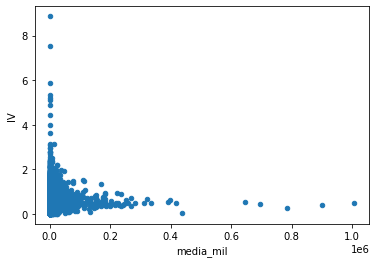

In [115]:
#Distrito
df_nal.plot(kind = 'scatter', x = 'media_mil', y = 'IV')
plt.show()

In [116]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

###### General

In [117]:
x = df_nal['media_mil'].values
y = df_nal['IV'].values

In [118]:
X = np.array(list(zip(x, y)))

In [122]:
kmeans = KMeans(n_clusters = 5)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [120]:
colors = ['m.', 'r.', 'c.', 'y.', 'g.', 'b.']

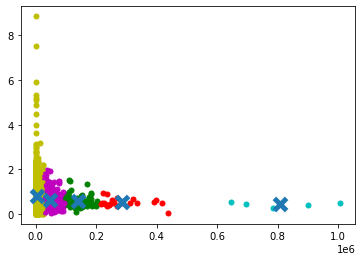

In [123]:
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 150, linewidths = 5, zorder = 10)
plt.show()

In [27]:
model = {"Distrito": df_nal['Distrito'], "Zona": df_nal['Zona'], "Gerente": df_nal['Gerente'], "Linea": df_nal['Linea'],
         "Media_mil": df_nal['media_mil'],"Desviacion_mil":  df_nal['desviacion_mil'],
         "Suma_mil":  df_nal['suma_mil'],"IV":  df_nal['IV'], "Cluster": labels}
df_model = pd.DataFrame(model)

In [ ]:
df_model.to_csv('modelo_gerencias_distrito_zona.csv', index = False)

##### Zonas

In [92]:
base_dtos_zna =  df_nal.groupby(['Distrito-Zona']).count()
base_dtos_zna = base_dtos_zna.loc[base_dtos_zna['Distrito'] >= 5]
base_dtos_zna.reset_index(inplace=True)
base_dtos_zna = base_dtos_zna['Distrito-Zona']
base_dtos_zna = base_dtos_zna.drop_duplicates()
for i in base_dtos_zna:
    #Definicion de valores x y y 
    df_nal2 = df_nal[df_nal['Distrito-Zona'] == i]
    x = df_nal2['media_mil'].values
    y = df_nal2['IV'].values
    X = np.array(list(zip(x, y)))
    #Parametros Kmeans
    kmeans = KMeans(n_clusters = 5)
    kmeans = kmeans.fit(X)
    labels = kmeans.predict(X)
    centroids = kmeans.cluster_centers_
    #Diccionario resultado
    model_dtos_zna = {"Distrito": df_nal2['Distrito'], "Zona": df_nal2['Zona'], "Gerente": df_nal2['Gerente'],
                  "Linea": df_nal2['Linea'], "Media_mil": df_nal2['media_mil'], 
                  "Desviacion_mil":  df_nal2['desviacion_mil'], "Suma_mil":  df_nal2['suma_mil'],
                  "IV":  df_nal2['IV'], "Cluster": labels}
    #DataFrame
    df_model = pd.DataFrame(model_dtos_zna)
    #Guardar archivos
    df_model.to_csv(f'C:/Users/tcardenas/OneDrive/OneDrive - Grupo DISPAPELES/Documents/Análisis clustering/Modelo gerencias x zonas/Distrito-zona {i}.csv', index = False, decimal = ",")
    print(f'Distrito-Zna {i} listo!')

Distrito-Zna 10-1 listo!
Distrito-Zna 10-10 listo!
Distrito-Zna 10-11 listo!
Distrito-Zna 10-12 listo!
Distrito-Zna 10-13 listo!
Distrito-Zna 10-14 listo!
Distrito-Zna 10-19 listo!
Distrito-Zna 10-2 listo!
Distrito-Zna 10-30 listo!
Distrito-Zna 10-300 listo!
Distrito-Zna 10-4 listo!
Distrito-Zna 10-5 listo!
Distrito-Zna 10-500 listo!
Distrito-Zna 10-501 listo!
Distrito-Zna 10-60 listo!
Distrito-Zna 10-61 listo!
Distrito-Zna 10-62 listo!
Distrito-Zna 10-63 listo!
Distrito-Zna 10-64 listo!
Distrito-Zna 10-65 listo!
Distrito-Zna 10-66 listo!
Distrito-Zna 10-68 listo!
Distrito-Zna 10-69 listo!
Distrito-Zna 10-7 listo!
Distrito-Zna 10-70 listo!
Distrito-Zna 10-71 listo!
Distrito-Zna 10-72 listo!
Distrito-Zna 10-73 listo!
Distrito-Zna 10-74 listo!
Distrito-Zna 10-75 listo!
Distrito-Zna 10-77 listo!
Distrito-Zna 10-78 listo!
Distrito-Zna 10-79 listo!
Distrito-Zna 10-80 listo!
Distrito-Zna 10-81 listo!
Distrito-Zna 10-9 listo!
Distrito-Zna 10-97 listo!
Distrito-Zna 15-20 listo!
Distrito-Zna 15

In [ ]:
base_dtos = df_base['Distrito']
base_dtos = base_dtos.drop_duplicates()
for i in base_dtos:
    #Definicion de valores x y y 
    df_nal2 = df_nal[df_nal['Distrito'] == i]
    x = df_nal2['media_mill'].values
    y = df_nal2['IV'].values
    X = np.array(list(zip(x, y)))
    #Parametros Kmeans
    kmeans = KMeans(n_clusters = 5)
    kmeans = kmeans.fit(X)
    labels = kmeans.predict(X)
    centroids = kmeans.cluster_centers_
    #Diccionario resutado
    model_dtos = {"Distrito": df_nal2['Distrito'], "Gerente": df_nal2['Gerente'], "Linea": df_nal2['Linea'],
         "Media_mill": df_nal2['media_mill'],"Desviacion_mill":  df_nal2['desviacion_mill'],
         "Suma_mill":  df_nal2['suma_mill'],"IV":  df_nal2['IV'], "Cluster": labels}
    #DataFrame
    df_model = pd.DataFrame(model_dtos)
    #Guardar archivos
    df_model.to_csv(f'C:/Users/tcardenas/OneDrive/OneDrive - Grupo DISPAPELES/Documents/Análisis clustering/Modelo gerencias/Distrito {i}.csv', index = False, decimal = ",")
    print(f'Distrito {i} listo!')

# Clientes

#### Cargue base general

In [93]:
df_base_cte = pd.read_excel("C:/Users/tcardenas/OneDrive/OneDrive - Grupo DISPAPELES/Documents/Análisis clustering/base_clientes.xlsx")

In [94]:
df_base_cte.columns

Index(['Ano', 'Mes', 'Distrito', 'Zona', 'Cliente', 'Ventas_mil'], dtype='object')

#### Group by gerencia/linea

In [101]:
df_cte = df_base_cte

#### Medidas para nacional

In [126]:
df_mean_nal_cte = df_cte.groupby(['Distrito', 'Zona', 'Cliente']).mean()
df_mean_nal_cte.rename({'Ventas_mil': 'media_mil'}, axis = 1, inplace = True)
df_mean_nal_cte = pd.DataFrame(df_mean_nal_cte['media_mil'])
df_sum_nal_cte = df_cte.groupby(['Distrito', 'Zona', 'Cliente']).sum()
df_sum_nal_cte.rename({'Ventas_mil': 'suma_mil'}, axis = 1, inplace = True)
df_sum_nal_cte = pd.DataFrame(df_sum_nal_cte['suma_mil'])
df_sd_nal_cte = df_cte.groupby(['Distrito', 'Zona', 'Cliente']).std()
df_sd_nal_cte.rename({'Ventas_mil': 'desviacion_mil'}, axis = 1, inplace = True)
df_sd_nal_cte = pd.DataFrame(df_sd_nal_cte['desviacion_mil'])
df_nal_cte = pd.concat([df_sum_nal_cte, df_mean_nal_cte, df_sd_nal_cte], axis = 1, join = "inner")
df_nal_cte['IV'] = df_nal_cte['desviacion_mil'] / df_nal_cte['media_mil']
df_nal_cte.reset_index(inplace=True)
df_nal_cte['Distrito-Zona'] = df_nal_cte['Distrito'].astype(str) + '-' + df_nal_cte['Zona'].astype(str)
df_nal_cte

,Distrito,Zona,Cliente,suma_mil,media_mil,desviacion_mil,IV,Distrito-Zona
0,10,1,9310944,48750,4.875000e+04,NaN,NaN,10-1
1,10,1,17135289,5621020,4.684183e+05,2.396612e+05,0.511639,10-1
2,10,1,17172243,21824295,2.424922e+06,1.736231e+06,0.715995,10-1
3,10,1,19173449,1279167,6.395835e+05,1.808277e+05,0.282727,10-1
4,10,1,19322486,20362361,2.545295e+06,1.224627e+06,0.481133,10-1
...,...,...,...,...,...,...,...,...
30698,90,500,900161488,643401,6.434010e+04,3.697292e+04,0.574648,90-500
30699,90,500,900228855,542490,1.084980e+05,7.775813e+03,0.071668,90-500
30700,90,500,900257204,20602,2.060200e+04,NaN,NaN,90-500
30701,90,500,1110477891,25684,2.568400e+04,NaN,NaN,90-500


In [127]:
meannan1_cte = df_nal_cte['desviacion_mil'].mean()
meannan2_cte = df_nal_cte['IV'].median()

df_nal_cte['IV'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_nal_cte['desviacion_mil'].replace([np.inf, -np.inf], np.nan, inplace=True)

df_nal_cte['desviacion_mil'].fillna(value=meannan1_cte, inplace=True)
df_nal_cte['IV'].fillna(value=meannan2_cte, inplace=True)

df_nal_cte.dropna(inplace = True)

df_nal_cte = df_nal_cte.loc[df_nal_cte['IV'] >= 0]
df_nal_cte = df_nal_cte.loc[df_nal_cte['IV'] <= 100]
df_nal_cte = df_nal_cte.loc[df_nal_cte['media_mil'] >= 0]
df_nal_cte

,Distrito,Zona,Cliente,suma_mil,media_mil,desviacion_mil,IV,Distrito-Zona
0,10,1,9310944,48750,4.875000e+04,1.984337e+06,0.555130,10-1
1,10,1,17135289,5621020,4.684183e+05,2.396612e+05,0.511639,10-1
2,10,1,17172243,21824295,2.424922e+06,1.736231e+06,0.715995,10-1
3,10,1,19173449,1279167,6.395835e+05,1.808277e+05,0.282727,10-1
4,10,1,19322486,20362361,2.545295e+06,1.224627e+06,0.481133,10-1
...,...,...,...,...,...,...,...,...
30698,90,500,900161488,643401,6.434010e+04,3.697292e+04,0.574648,90-500
30699,90,500,900228855,542490,1.084980e+05,7.775813e+03,0.071668,90-500
30700,90,500,900257204,20602,2.060200e+04,1.984337e+06,0.555130,90-500
30701,90,500,1110477891,25684,2.568400e+04,1.984337e+06,0.555130,90-500


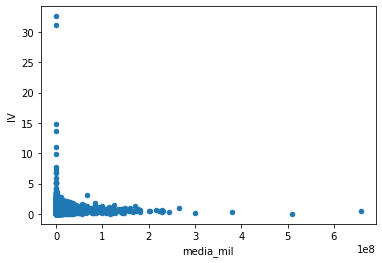

In [106]:
df_nal_cte.plot(kind = 'scatter', x = 'media_mil', y = 'IV')

plt.show()

In [107]:
x2 = df_nal_cte['media_mil'].values
y2 = df_nal_cte['IV'].values

In [108]:
X2 = np.array(list(zip(x2, y2)))

In [109]:
kmeans2 = KMeans(n_clusters = 5)
kmeans2 = kmeans2.fit(X2)
labels2 = kmeans2.predict(X2)
centroids2 = kmeans2.cluster_centers_

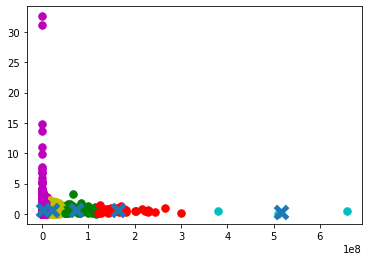

In [110]:
for i in range(len(X2)):
    plt.plot(X2[i][0], X2[i][1], colors[labels2[i]], markersize = 15)
plt.scatter(centroids2[:, 0], centroids2[:, 1], marker = 'x', s = 150, linewidths = 5, zorder = 10)
plt.show()

In [130]:
base_dtos_zna2 =  df_nal_cte.groupby(['Distrito-Zona']).count()
base_dtos_zna2 = base_dtos_zna2.loc[base_dtos_zna2['Distrito'] >= 5]
base_dtos_zna2.reset_index(inplace=True)
base_dtos_zna2 = base_dtos_zna2['Distrito-Zona']
base_dtos_zna2 = base_dtos_zna2.drop_duplicates()
for i in base_dtos_zna2:
    #Definicion de valores x y y 
    df_nal2 = df_nal_cte[df_nal_cte['Distrito-Zona'] == i]
    x = df_nal2['media_mil'].values
    y = df_nal2['IV'].values
    X = np.array(list(zip(x, y)))
    #Parametros Kmeans
    kmeans = KMeans(n_clusters = 5)
    kmeans = kmeans.fit(X)
    labels = kmeans.predict(X)
    centroids = kmeans.cluster_centers_
    #Diccionario resutado
    model_dtos_zna = {"Distrito": df_nal2['Distrito'], "Zona":df_nal2['Zona'], "Cliente": df_nal2['Cliente'],
                  "Media_mil": df_nal2['media_mil'], "Desviacion_mil":  df_nal2['desviacion_mil'],
                  "Suma_mil":  df_nal2['suma_mil'], "IV":  df_nal2['IV'], "Cluster": labels}
    #DataFrame
    df_model = pd.DataFrame(model_dtos_zna)
    #Guardar archivos
    df_model.to_csv(f'C:/Users/tcardenas/OneDrive/OneDrive - Grupo DISPAPELES/Documents/Análisis clustering/Modelo clientes x zonas/Distrito-zona {i}.csv', index = False, decimal = ",")
    print(f'Distrito-zona {i} listo!')

Distrito-zona 10-1 listo!
Distrito-zona 10-10 listo!
Distrito-zona 10-11 listo!
Distrito-zona 10-12 listo!
Distrito-zona 10-13 listo!
Distrito-zona 10-14 listo!
Distrito-zona 10-18 listo!
Distrito-zona 10-19 listo!
Distrito-zona 10-2 listo!
Distrito-zona 10-300 listo!
Distrito-zona 10-4 listo!
Distrito-zona 10-5 listo!
Distrito-zona 10-501 listo!
Distrito-zona 10-60 listo!
Distrito-zona 10-61 listo!
Distrito-zona 10-62 listo!
Distrito-zona 10-63 listo!
Distrito-zona 10-64 listo!
Distrito-zona 10-65 listo!
Distrito-zona 10-66 listo!
Distrito-zona 10-68 listo!
Distrito-zona 10-69 listo!
Distrito-zona 10-7 listo!
Distrito-zona 10-70 listo!
Distrito-zona 10-71 listo!
Distrito-zona 10-72 listo!
Distrito-zona 10-73 listo!
Distrito-zona 10-74 listo!
Distrito-zona 10-75 listo!
Distrito-zona 10-77 listo!
Distrito-zona 10-78 listo!
Distrito-zona 10-79 listo!
Distrito-zona 10-80 listo!
Distrito-zona 10-81 listo!
Distrito-zona 10-9 listo!
Distrito-zona 10-97 listo!
Distrito-zona 15-20 listo!
Distr